## Основы предобработки данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
# pip install seaborn

### Загрузка данных и предварительный анализа

Dibetes dataset https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [3]:
diabetes_df = pd.read_csv('diabetes.csv', index_col=None)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Изучение и обработка количественных признаков

In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [8]:
diabetes_df.var()

Pregnancies                    11.354
Glucose                      1022.248
BloodPressure                 374.647
SkinThickness                 254.473
Insulin                     13281.180
BMI                            62.160
DiabetesPedigreeFunction        0.110
Age                           138.303
Outcome                         0.227
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

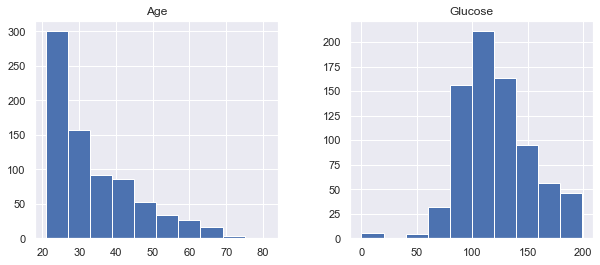

In [9]:
diabetes_df[['Age','Glucose']].hist(figsize=(10, 4))

Histograms vs. Kernel Density Estimation <br>
https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28 

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

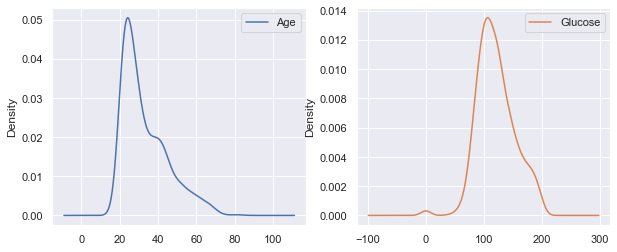

In [10]:
diabetes_df[['Age','Glucose']].plot(kind='density', layout=(1, 2), subplots=True,
                                    figsize=(10, 4), sharex=False)

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

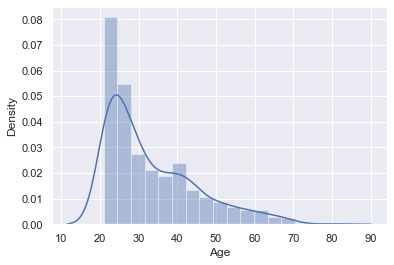

In [11]:
sns.distplot(diabetes_df['Age'])

### Обработка выбросов

<AxesSubplot:xlabel='Insulin'>

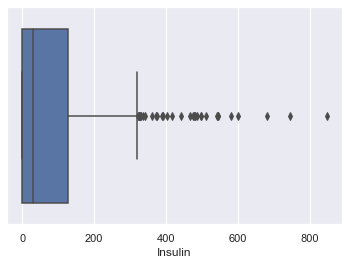

In [12]:
sns.boxplot(x='Insulin', data=diabetes_df)

<AxesSubplot:>

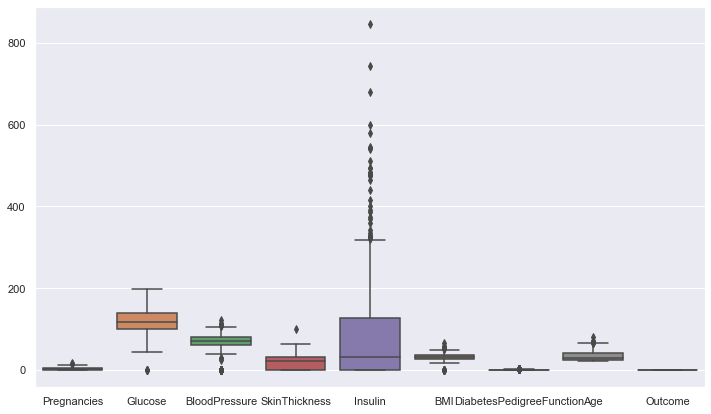

In [13]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

In [14]:
diabetes_df['Insulin'] = diabetes_df.Insulin.clip(lower=diabetes_df.Insulin.quantile(0.05), 
                                                  upper=diabetes_df.Insulin.quantile(0.95))

<AxesSubplot:>

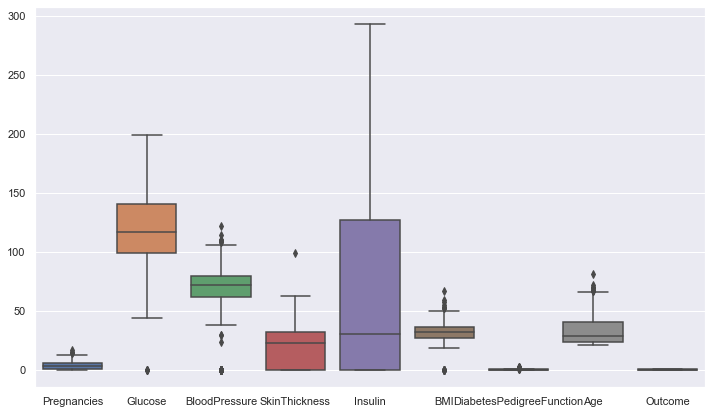

In [15]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

### Обработка пропущенных значений

#### Поиск пропусков

In [16]:
no_zero_columns = list (set(diabetes_df.columns) -  set(['Outcome','Pregnancies']))

In [17]:
(diabetes_df[no_zero_columns] == 0).sum()

Age                           0
SkinThickness               227
BMI                          11
DiabetesPedigreeFunction      0
Insulin                     374
Glucose                       5
BloodPressure                35
dtype: int64

In [18]:
diabetes_df.loc[:, no_zero_columns] = diabetes_df[no_zero_columns].replace(0, np.NaN)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,763.000,733.000,541.000,394.000,757.000,768.000,768.000,768.000
mean,3.845,121.687,72.405,29.153,141.246,32.457,0.472,33.241,0.349
std,3.370,30.536,12.382,10.477,79.175,6.925,0.331,11.760,0.477
min,0.000,44.000,24.000,7.000,14.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,22.000,76.250,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,29.000,125.000,32.300,0.372,29.000,0.000
75%,6.000,141.000,80.000,36.000,190.000,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,293.000,67.100,2.420,81.000,1.000


<AxesSubplot:>

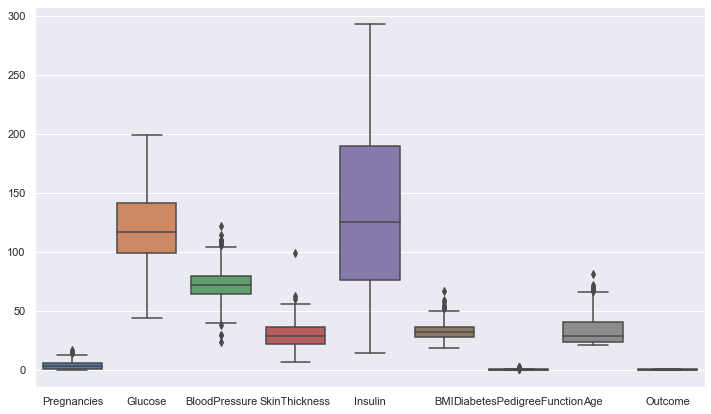

In [21]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

#### Работа с пропусками

In [22]:
# "Плохие" способы:

    # Удаляем строки
print (diabetes_df.dropna(how='any', axis=0).shape)

    # Удаляем столбцы
print (diabetes_df.dropna(how='any', axis=1).shape)

(392, 9)
(768, 4)


In [23]:
diabetes_df.isnull().mean()

Pregnancies                 0.000
Glucose                     0.007
BloodPressure               0.046
SkinThickness               0.296
Insulin                     0.487
BMI                         0.014
DiabetesPedigreeFunction    0.000
Age                         0.000
Outcome                     0.000
dtype: float64

In [24]:
# Удалить столбцы, в которых много пропущенных значение
diabetes_df.loc[:, diabetes_df.isnull().mean() < .25].shape

(768, 7)

In [25]:
# Заполняем произвольным значением

diabetes_df.fillna(-1).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,-1.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,-1.0,26.6,0.351,31,0
2,8,183.0,64.0,-1.0,-1.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [26]:
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# diabetes_df['Glucose'].fillna((diabetes['Glucose']).mode()[0], inplace=True)
# diabetes_df['BMI'].fillna((diabetes['BMI']).mean(), inplace=True)
# diabetes_df['Insulin'].fillna((diabetes['Insulin']).median(), inplace=True)

diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Дискретизация данных (binning)

In [27]:
# Equal-width partitioning

diabetes_df['Age_equal'] = pd.cut(diabetes_df['Age'], 5)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_equal
0,6,148.0,72.0,35.000,141.246,33.6,0.627,50,1,"(45.0, 57.0]"
1,1,85.0,66.0,29.000,141.246,26.6,0.351,31,0,"(20.94, 33.0]"
2,8,183.0,64.0,29.153,141.246,23.3,0.672,32,1,"(20.94, 33.0]"
3,1,89.0,66.0,23.000,94.000,28.1,0.167,21,0,"(20.94, 33.0]"
4,0,137.0,40.0,35.000,168.000,43.1,2.288,33,1,"(20.94, 33.0]"


In [28]:
# Expert partitioning

bins = [0,12,19,35,60,100]
group_names = ['Child', 'Teenager', 'Young', 'Adult','Elderly']
diabetes_df['Age_expert'] = pd.cut(diabetes_df['Age'], bins, labels=group_names)
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_equal,Age_expert
0,6,148.0,72.0,35.000,141.246,33.6,0.627,50,1,"(45.0, 57.0]",Adult
1,1,85.0,66.0,29.000,141.246,26.6,0.351,31,0,"(20.94, 33.0]",Young
2,8,183.0,64.0,29.153,141.246,23.3,0.672,32,1,"(20.94, 33.0]",Young
3,1,89.0,66.0,23.000,94.000,28.1,0.167,21,0,"(20.94, 33.0]",Young
4,0,137.0,40.0,35.000,168.000,43.1,2.288,33,1,"(20.94, 33.0]",Young


### Изучение категориальных и бинарных признаков

In [29]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [30]:
diabetes_df['Age_equal'].value_counts()

(20.94, 33.0]    474
(33.0, 45.0]     176
(45.0, 57.0]      76
(57.0, 69.0]      39
(69.0, 81.0]       3
Name: Age_equal, dtype: int64

In [31]:
diabetes_df['Age_expert'].value_counts()

Young       498
Adult       243
Elderly      27
Child         0
Teenager      0
Name: Age_expert, dtype: int64

<AxesSubplot:>

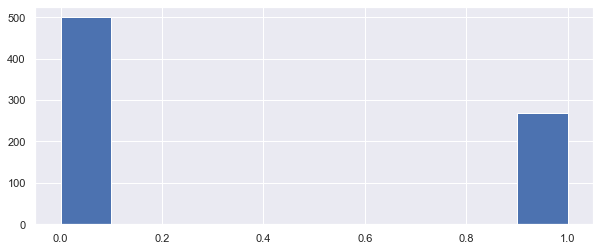

In [32]:
diabetes_df['Outcome'].hist(figsize=(10, 4))

<AxesSubplot:>

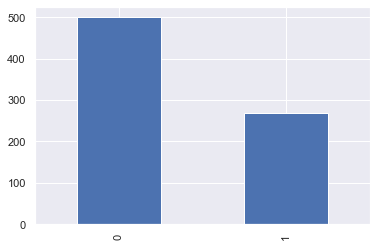

In [33]:
diabetes_df['Outcome'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

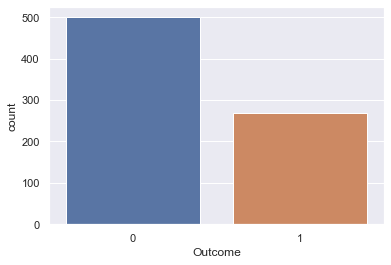

In [34]:
sns.countplot(x='Outcome', data=diabetes_df)

<AxesSubplot:xlabel='Age_equal', ylabel='count'>

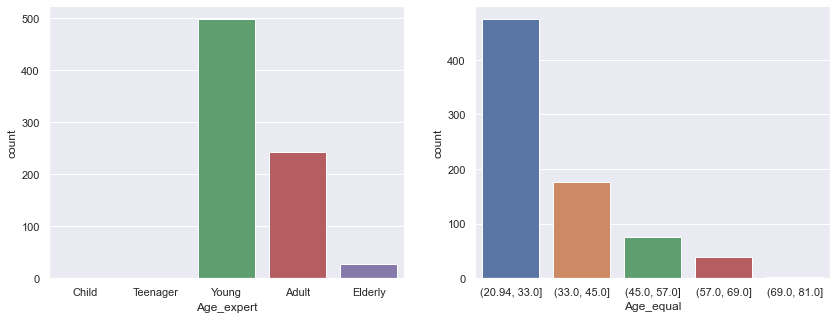

In [35]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='Age_expert', data=diabetes_df, ax=axes[0])
sns.countplot(x='Age_equal', data=diabetes_df, ax=axes[1])

### Изчение взаимодействия признаков

#### Только количественные признаки

Text(0, 0.5, 'Insulin')

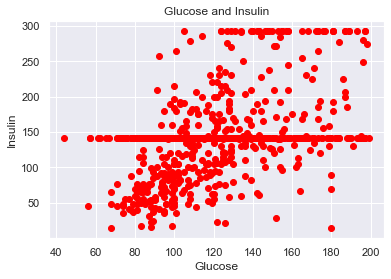

In [36]:
plt.scatter(diabetes_df['Glucose'], diabetes_df['Insulin'], color='red')
plt.title('Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

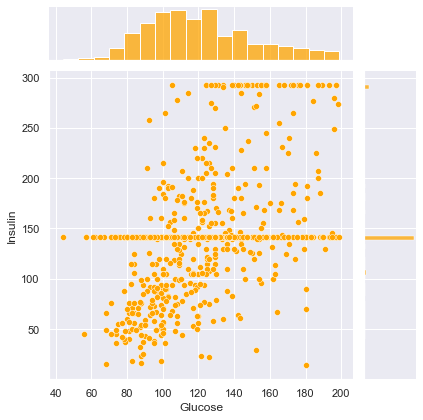

In [37]:
sns.jointplot(x='Glucose', y='Insulin', data=diabetes_df, kind='scatter', color='orange')


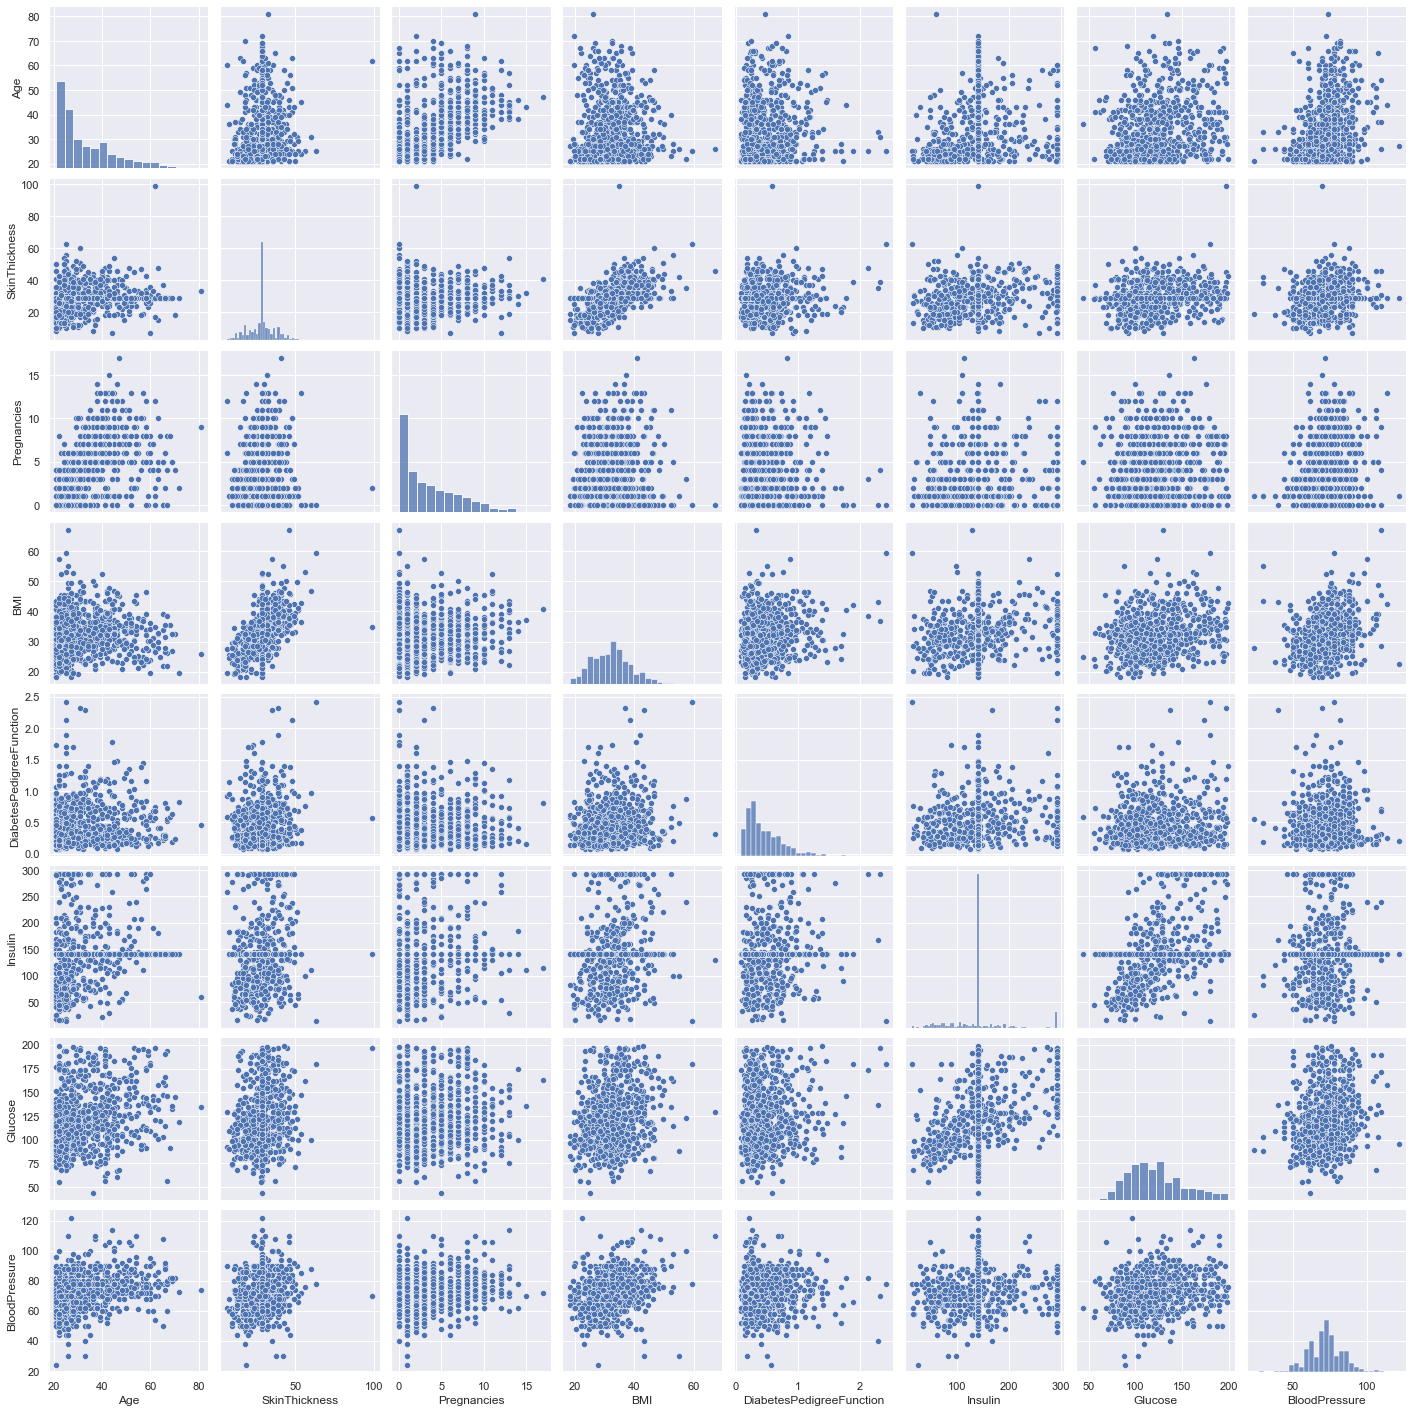

In [38]:
num_columns = list(set(diabetes_df.columns) -  set(['Outcome','Age_expert','Age_equal']))
sns.pairplot(diabetes_df[num_columns])

In [39]:
corr_matrix = diabetes_df[num_columns].corr()
corr_matrix

,Age,SkinThickness,Pregnancies,BMI,DiabetesPedigreeFunction,Insulin,Glucose,BloodPressure
Age,1.000,0.128,0.544,0.026,0.034,0.152,0.267,0.325
SkinThickness,0.128,1.000,0.083,0.542,0.101,0.173,0.193,0.193
Pregnancies,0.544,0.083,1.000,0.022,-0.034,0.086,0.128,0.209
BMI,0.026,0.542,0.022,1.000,0.153,0.193,0.231,0.281
DiabetesPedigreeFunction,0.034,0.101,-0.034,0.153,1.000,0.093,0.137,-0.003
Insulin,0.152,0.173,0.086,0.193,0.093,1.000,0.448,0.098
Glucose,0.267,0.193,0.128,0.231,0.137,0.448,1.000,0.218
BloodPressure,0.325,0.193,0.209,0.281,-0.003,0.098,0.218,1.000


<AxesSubplot:>

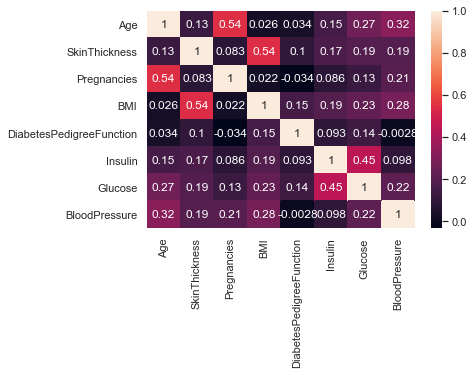

In [40]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

#### Количественные и качественные признаки

In [41]:
diabetes_df.pivot_table(['Glucose', 'Insulin'],['Outcome'], aggfunc='mean')

,Glucose,Insulin
Outcome,,
0,110.710,130.994
1,142.166,160.373


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

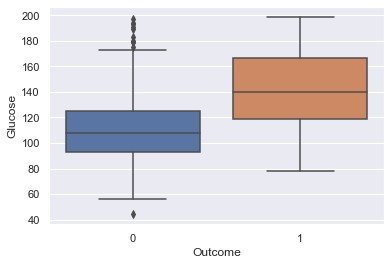

In [42]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


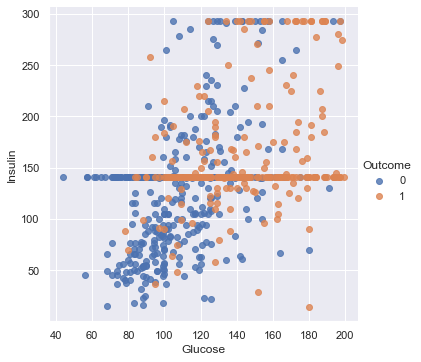

In [43]:
sns.lmplot('Glucose', 'Insulin', data=diabetes_df, hue='Outcome', fit_reg=False);

#### Только качественные признаки

In [44]:
pd.crosstab(diabetes_df['Age_equal'], diabetes_df['Outcome'], margins=True)

Outcome,0,1,All
Age_equal,,,
"(20.94, 33.0]",352,122,474
"(33.0, 45.0]",88,88,176
"(45.0, 57.0]",32,44,76
"(57.0, 69.0]",26,13,39
"(69.0, 81.0]",2,1,3
All,500,268,768


<AxesSubplot:xlabel='Age_equal', ylabel='count'>

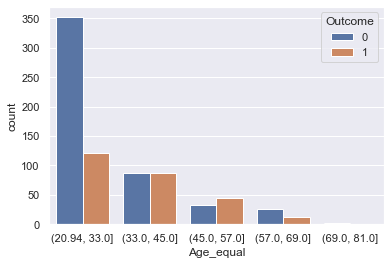

In [45]:
sns.countplot(x='Age_equal', hue='Outcome', data=diabetes_df)

### Нормализация данных

<AxesSubplot:ylabel='Density'>

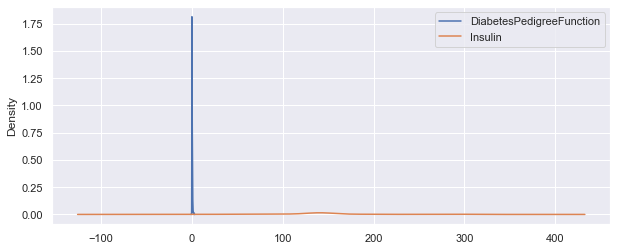

In [46]:
diabetes_df[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

<AxesSubplot:>

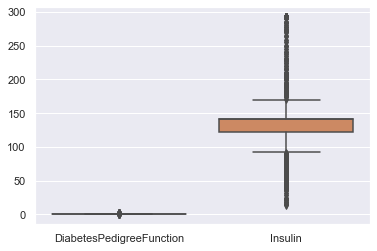

In [47]:
sns.boxplot(data=diabetes_df[['DiabetesPedigreeFunction', 'Insulin']])

In [48]:
std_scaler = StandardScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_std_scaled = std_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

minmax_scaler = MinMaxScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_minmax_scaled = minmax_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

type(cols_std_scaled)

numpy.ndarray

In [49]:
print('Mean after standardization:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_std_scaled[:,0].mean(), cols_std_scaled[:,1].mean()))
print('\nStandard deviation after standardization:\nGlucose={:.2f}, Insulin={:.2f}\n'
      .format(cols_std_scaled[:,0].std(), cols_std_scaled[:,1].std()))

print('Mean after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].mean(), cols_minmax_scaled[:,1].mean()))
print('\nStandard deviation after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].std(), cols_minmax_scaled[:,1].std()))

Mean after standardization:
DiabetesPedigreeFunction=0.00, Insulin=-0.00

Standard deviation after standardization:
Glucose=1.00, Insulin=1.00

Mean after min-max scaling:
DiabetesPedigreeFunction=0.17, Insulin=0.46

Standard deviation after min-max scaling:
DiabetesPedigreeFunction=0.14, Insulin=0.20


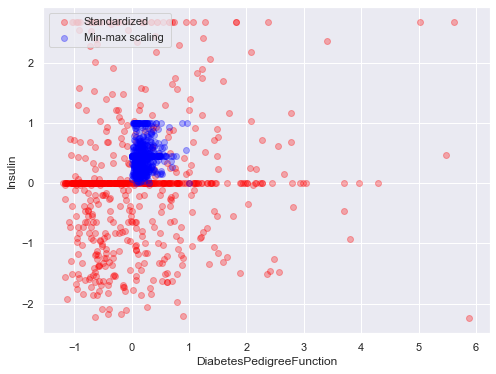

In [50]:
plt.figure(figsize=(8,6))
#plt.scatter(diabetes_df['DiabetesPedigreeFunction'], diabetes_df['Insulin'], color='orange', label='input scale', alpha=0.5)  
plt.scatter(cols_std_scaled[:,0], cols_std_scaled[:,1], color='red', label='Standardized', alpha=0.3)
plt.scatter(cols_minmax_scaled[:,0], cols_minmax_scaled[:,1],color='blue', label='Min-max scaling ', alpha=0.3)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Insulin')
plt.legend(loc='upper left')


<AxesSubplot:ylabel='Density'>

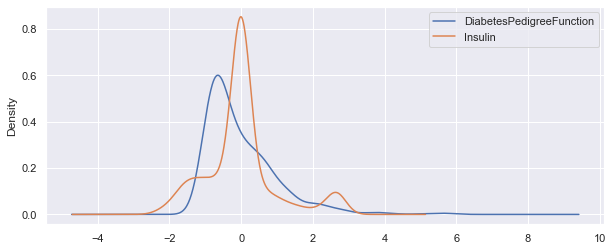

In [51]:
diabetes_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['DiabetesPedigreeFunction', 'Insulin'])

diabetes_df_scaled[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

<AxesSubplot:>

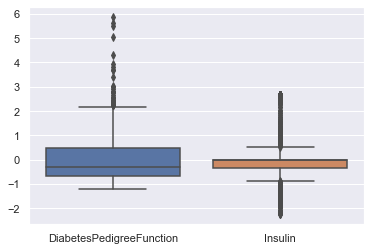

In [52]:
sns.boxplot(data=diabetes_df_scaled[['DiabetesPedigreeFunction', 'Insulin']])